# Homework 5: GroupBy
Dr. Leslie Kerby <br>
Data Science and Applied Machine Learning <br>
Student's Name: Ziming Wang

In [1]:
import numpy as np
import pandas as pd
income = pd.read_csv('https://raw.githubusercontent.com/LGKerby/Python/master/en-2016-pssd-compendium.csv')
income.head()

,Sector,Last Name,First Name,Salary Paid,Taxable Benefits,Employer,Job Title,Calendar Year
0,Colleges,Abbas,Sadiq,"$105,595.39",$84.24,Algonquin College,Professor,2016
1,Colleges,Abboud,Nadim,"$108,393.10",$126.96,Algonquin College,Professor,2016
2,Colleges,Agate,Jeffery M.,"$125,779.64",$325.58,Algonquin College,"Associate Director, Student Support Services",2016
3,Colleges,Al-Azzawi,Abdul,"$105,595.41",$84.24,Algonquin College,Professor,2016
4,Colleges,Alexander,Doug,"$105,595.41",$126.96,Algonquin College,Professor,2016


**Question 1**</br>
Use apply to create a new column called 'Salary ($)' which contains salary as a number.

In [3]:
income['Salary ($)'] = income['Salary Paid'].apply( lambda x : float(x.strip('$').replace(',', '')) )
income.head()

,Sector,Last Name,First Name,Salary Paid,Taxable Benefits,Employer,Job Title,Calendar Year,Salary ($)
0,Colleges,Abbas,Sadiq,"$105,595.39",$84.24,Algonquin College,Professor,2016,105595.39
1,Colleges,Abboud,Nadim,"$108,393.10",$126.96,Algonquin College,Professor,2016,108393.10
2,Colleges,Agate,Jeffery M.,"$125,779.64",$325.58,Algonquin College,"Associate Director, Student Support Services",2016,125779.64
3,Colleges,Al-Azzawi,Abdul,"$105,595.41",$84.24,Algonquin College,Professor,2016,105595.41
4,Colleges,Alexander,Doug,"$105,595.41",$126.96,Algonquin College,Professor,2016,105595.41


**Question 2**</br>
Use `groupby` on `Sector` to create a subset of the `income` DataFrame (call it `universities`) that contains only Universities. Create a second subset DataFrame called `colleges` that contains only Colleges. </br>
*Hint: There are 35 universities (with a total of 17,948 employees) and 24 colleges (with a total of 5,375 employees) in the `income` dataset.*

In [70]:
universities = income.groupby('Sector').get_group('Universities')
colleges = income.groupby('Sector').get_group('Colleges')
print(universities)
print(colleges)

              Sector  Last Name  ... Calendar Year Salary ($)
106497  Universities    Antunes  ...          2016  111522.52
106498  Universities    Biocchi  ...          2016  101054.66
106499  Universities      Boyle  ...          2016  107326.52
106500  Universities      Broad  ...          2016  150650.00
106501  Universities   Brodbeck  ...          2016  117580.69
...              ...        ...  ...           ...        ...
124440  Universities      Zikic  ...          2016  185684.11
124441  Universities  Zimmerman  ...          2016  139863.15
124442  Universities      Zoidl  ...          2016  207119.70
124443  Universities       Zryd  ...          2016  161816.45
124444  Universities      Zwick  ...          2016  227631.59

[17948 rows x 9 columns]
        Sector  Last Name  ... Calendar Year Salary ($)
0     Colleges      Abbas  ...          2016  105595.39
1     Colleges     Abboud  ...          2016  108393.10
2     Colleges      Agate  ...          2016  125779.64
3     

**Question 3**</br>
Calculate the average salary and standard deviation for employees at `universities` and compare it to the average salary and standard deviation for employees at `colleges`. </br>
Create histogram plots of the salaries for both `universities` and `colleges`. Show plots of both tally bins and as a probability distribution.
</br> What do you observe?

In [180]:
print(universities['Salary ($)'].agg([np.mean, np.std]))
print(colleges['Salary ($)'].agg([np.mean, np.std]))

mean    150235.606819
std      42138.946408
Name: Salary ($), dtype: float64
mean    113920.959600
std      22498.801433
Name: Salary ($), dtype: float64


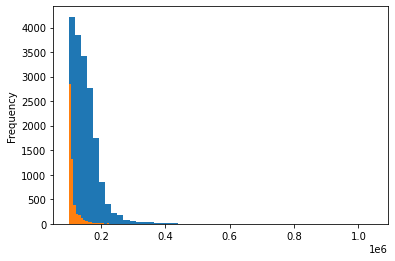

In [181]:
universities['Salary ($)'].plot.hist(bins = 50)
colleges['Salary ($)'].plot.hist(bins = 50) # Print hist

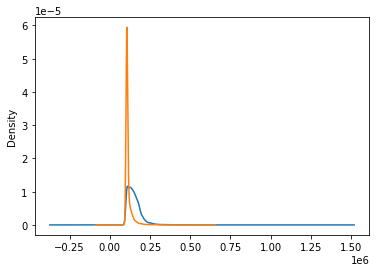

In [182]:
universities['Salary ($)'].plot.density()
colleges['Salary ($)'].plot.density() # Print density

# The salary of colleges is much higher than that of universities

**Question 4**</br>
GroupBy `Employer` in the `universities` and `colleges` DataFrames. </br>
Plot a bar chart of the average salary for each Employer in `universities`. Do the same for `colleges`.</br>
Find the lowest and highest average-salary University. For each, how many employees do they have making over $100,000CAN? Do some basic internet searching on each university and hypothesize why they have the highest and lowest average high-income earners.

In [ ]:
universities.groupby('Employer').mean().plot.bar()
colleges.groupby('Employer').mean().plot.bar()  # bar chart

In [176]:
print(universities.groupby('Employer').mean().idxmin())
universities.groupby('Employer').mean().min() # lowest average-salary University

Salary ($)    Saint Paul University
dtype: object


Salary ($)    108079.975294
dtype: float64

In [177]:
print(universities.groupby('Employer').mean().idxmax())
universities.groupby('Employer').mean().max() # Highest average-salary University

Salary ($)    University of Toronto
dtype: object


Salary ($)    160999.197609
dtype: float64

In [ ]:
Lowest_University = universities.groupby('Employer').mean().idxmin().item()
Highest_University = universities.groupby('Employer').mean().idxmax().item()

Lowest_income = universities.groupby('Employer').get_group(Lowest_University)
len(Lowest_income[Lowest_income['Salary ($)'] > 100000])  # How many employees do they have making over $100,000CAN on the lowest average-salary University

In [ ]:
Highest_income = universities.groupby('Employer').get_group(Highest_University)
len(Highest_income[Highest_income['Salary ($)'] > 100000])  # How many employees do they have making over $100,000CAN on the highest average-salary University

In [179]:
# Because Saint Paul University ranks more than 8000 globally, and the University of Toronto ranks more than 20 globally. Most students are willing to study in top-ranked schools.
# So the University of Toronto's income will be higher, and at the same time, the employees' wages will also be higher.

**Question 5**</br>
Select only the `University of Waterloo` group from the Question 4 GroupBy DataFrame; save it as `waterloo`.</br>
Use a Boolean Mask to keep only `Job Title`s that contain `Professor`. How many employees were filtered out in doing this? </br>
Then GroupBy `waterloo` by `Job Title`. Plot the average salary for each `Job Title` group. </br>
Now use `filter` to keep only the `groups` which have at least `10` employees, and again plot the average salary for each `Job Title` group left. </br>
What do you observe?


In [ ]:
waterloo = universities.groupby('Employer').get_group('University of Waterloo')
waterloo

In [ ]:
Professor_water_contain = waterloo[waterloo['Job Title'].str.contains('Professor')]
len(waterloo) - len(Professor_water_contain) #  How many employees were filtered out in doing this( The job Title contains "Professor" )

In [ ]:
Professor_after = Professor_water_contain.groupby('Job Title')
Professor_after

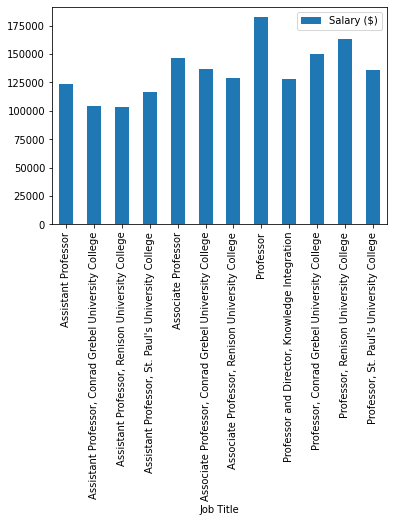

In [190]:
Professor_after.mean().plot.bar()

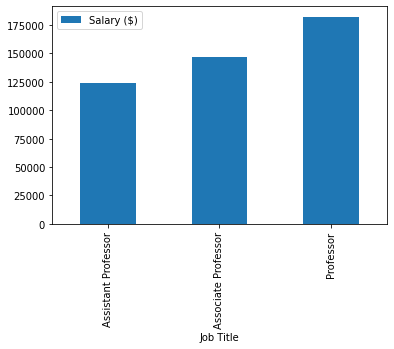

In [191]:
Professor_after.filter( lambda x : len(x) > 9 ).groupby("Job Title").mean().plot.bar()

In [ ]:
# I found that Professor makes the most money in the Job Title.

**Graduate Students Only:** \\
Create your subsets of Universities and Colleges using a boolean mask on `Employer` instead of `groupby`. What differences do you observe in the two methods? Which is better? Are there colleges/universities with the French spelling that are left out of your subsets? Discuss.